In [7]:
import pandas as pd
answers = pd.read_csv("./output/answers.csv")
specs = pd.read_csv("./output/model_specs.csv")
answers.head()
# answers.loc[11].answer, answers.loc[5].model_name, 

,prompt,answer,cpu,gpu,memory,time,model_name
0,"{'type': 'chat', 'text': 'Are you alive?'}","I am a large language model, trained by Google...",98.6,0,0.0,1.209460735321045,google/gemma-3-270m-it
1,"{'type': 'chat', 'text': 'Plan me a roadtrip f...","Okay, let's plan a road trip from Oklahoma to ...",99.9,6,0.0,4.18961763381958,google/gemma-3-270m-it
2,"{'type': 'chat', 'text': 'Name the current Was...",The current Washington Spirit roster is as fol...,100.0,25,4.0,4.413763046264648,google/gemma-3-270m-it
3,"{'type': 'translate', 'target_lang': 'English'...","The most common and natural translation of ""Me...",100.9,23,3.0,0.47018861770629883,google/gemma-3-270m-it
4,"{'type': 'translate', 'target_lang': 'Spanish'...",The most common and natural translation is:\n\...,102.0,22,3.0,0.34734344482421875,google/gemma-3-270m-it


,model,model_load_time,mean_answer_time,source,name
0,google/gemma-3-270m-it,2.067392,2.615385,local,gemma-3
1,Qwen/Qwen2.5-0.5B-Instruct,0.813626,8.153846,local,qwen-2.5
2,meta-llama/Llama-3.2-1B-Instruct,10.873853,24.076923,local,llama-3.2
3,gpt-oss-120b,NaN,1.235020,api,gpt-oss
4,llama-4-maverick-17b-128e-instruct,NaN,0.440463,api,llama-4
5,qwen-3-235b-a22b-instruct-2507,NaN,0.562821,api,qwen-3


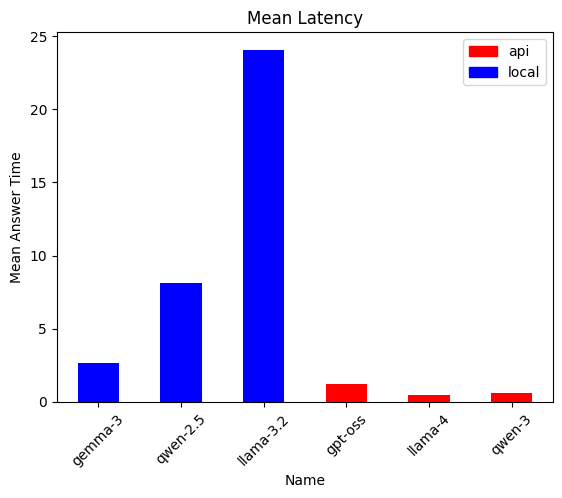

In [8]:
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
import pandas as pd
colors = {"api": 'r', "local": 'b'}
handles = [mpatches.Patch(color=colors[i]) for i in colors]
labels = [i for i in colors]
specs.plot.bar(x="name", y="mean_answer_time", rot=45,ylabel="Mean Answer Time",xlabel="Name",title="Mean Latency",
               color=[colors[i] for i in specs['source']])
plt.legend(handles, labels)

specs


In [9]:
answers['answer_len'] = answers['answer'].apply(len)

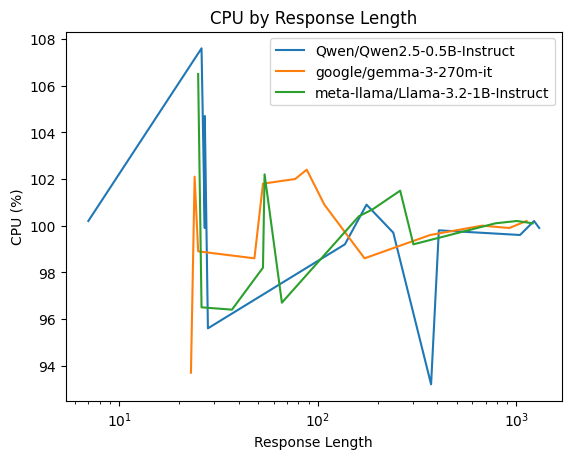

In [10]:
import matplotlib.pyplot as plt
lens_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['answer_len'].apply(list)
cpu_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['cpu'].apply(list)
for idx, val in enumerate(cpu_by_model.values):
    x1 = lens_by_model.values[idx]
    y1 = val
    plt.plot(x1, y1, label=lens_by_model.keys()[idx])


# Add labels and a title
plt.xlabel("Response Length")
plt.ylabel("CPU (%)")
plt.title("CPU by Response Length")
plt.xscale('log')
# Add a legend to differentiate the lines
plt.legend()

# Display the plot
plt.show()

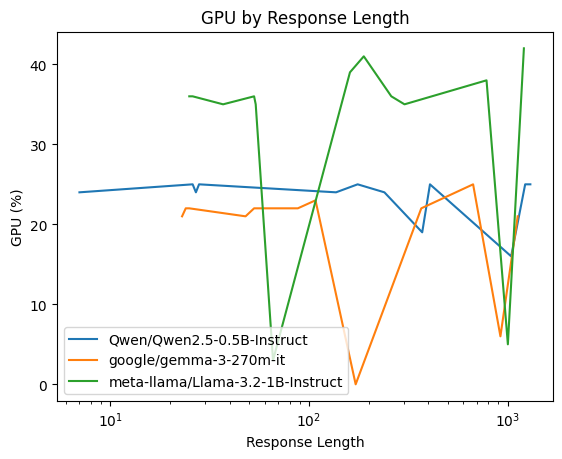

In [11]:
import matplotlib.pyplot as plt
import numpy as np
lens_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['answer_len'].apply(list)
gpu_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['gpu'].apply(list)
for idx, val in enumerate(gpu_by_model.values):
    if np.mean(val) >0:
        x1 = lens_by_model.values[idx]
        y1 = val
        plt.plot(x1, y1, label=lens_by_model.keys()[idx])


# Add labels and a title
plt.xlabel("Response Length")
plt.ylabel("GPU (%)")
plt.title("GPU by Response Length")
plt.xscale('log')
# Add a legend to differentiate the lines
plt.legend()

# Display the plot
plt.show()

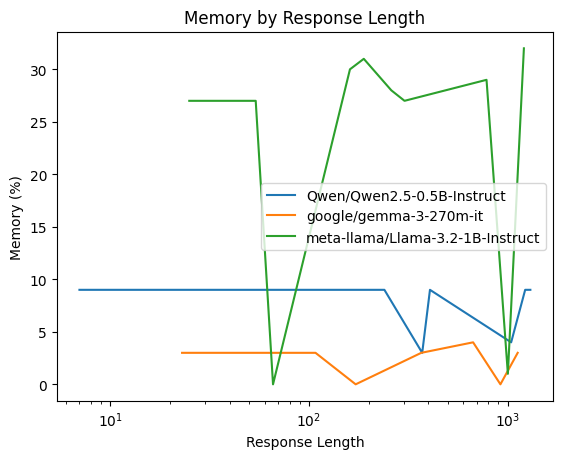

In [12]:
import matplotlib.pyplot as plt
import numpy as np
lens_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['answer_len'].apply(list)
memory_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['memory'].apply(list)
for idx, val in enumerate(memory_by_model.values):
    if np.mean(val) >0:
        x1 = lens_by_model.values[idx]
        y1 = val
        plt.plot(x1, y1, label=lens_by_model.keys()[idx])


# Add labels and a title
plt.xlabel("Response Length")
plt.ylabel("Memory (%)")
plt.title("Memory by Response Length")
plt.xscale('log')
# Add a legend to differentiate the lines
plt.legend()

# Display the plot
plt.show()

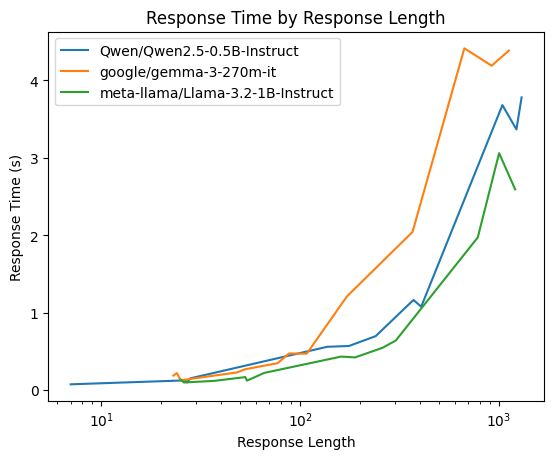

In [16]:
import matplotlib.pyplot as plt
import numpy as np
lens_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['answer_len'].apply(list)
time_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['time'].apply(list)
for idx, val in enumerate(time_by_model.values):
    val_nums = [float(v) for v in val]
    if np.mean(val_nums) >0:
        x1 = lens_by_model.values[idx]
        y1 = val_nums
        plt.plot(x1, y1, label=lens_by_model.keys()[idx])


# Add labels and a title
plt.xlabel("Response Length")
plt.ylabel("Response Time (s)")
plt.title("Response Time by Response Length")
plt.xscale('log')
# Add a legend to differentiate the lines
plt.legend()

# Display the plot
plt.show()